In [1]:
from pathlib import Path
from brainlit.utils.swc import read_swc_offset
from brainlit.algorithms.trace_analysis.fit_spline import GeometricGraph
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
from scipy.interpolate import splev

# Fitting Splines to Neuron Trace SWC Tutorial

## 1) Define variables
- `swc` the geometric graph
- `df,_,_,_` read the x, y, and z columns in swc file
- `neuron` define a new class inherited from `GeometricGraph` class

In [2]:
swc = Path(
    "C:/Users/user/brainlit/data/data_octree/consensus-swcs/2018-08-01_G-002_consensus.swc"
)

df,_,_,_ = read_swc_offset(swc)
#df, offset, color, cc, branch = read_swc(swc)

neuron = GeometricGraph()

## 2) Extract data from swc and initiate neuron tree
- `samp` data extracted from `sample` coloumn of swc
- `loc` data extracted from `x`, `y`, and `z` columns of swc
- `soma` define the data on the first run as the location of soma
- `neuron` the neuron tree contains the sample index (integer number), the location in 3-D space (x,y,z), parent index (integer)
- `par` the current data's parent index will be added to `neuron` if already defined in swc; otherwise, raise error

In [3]:
first = True
for row in df.itertuples(index=False):
    samp = row.sample
    loc = np.array([row.x, row.y, row.z])
    if first:
        soma = loc
        first = False
    neuron.add_node(samp, loc=loc)
    # print(neuron.nodes[samp]['loc'])
    # raise ValueError
    par = row.parent
    if par != -1:
        if par > samp:
            raise ValueError("Parent has not been added yet")
        neuron.add_edge(samp, par)

## 3) Plot the whole spline tree
- `spline_tree` use the `fit_spline_tree_invariant` to locate neuron branches

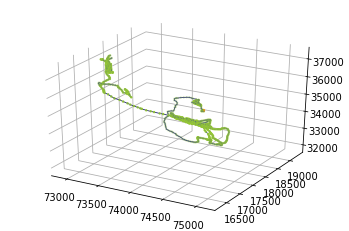

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
spline_tree = neuron.fit_spline_tree_invariant()
for node in spline_tree.nodes:
    path = spline_tree.nodes[node]["path"]
    locs = np.zeros((len(path),3))
    for p,point in enumerate(path):
        locs[p,:] = neuron.nodes[point]["loc"]
    ax.scatter(locs[:,0], locs[:,1], locs[:,2], marker=".",edgecolor='yellowgreen',linewidths=1,c='mediumblue', s=8)
    ax.plot(locs[:,0], locs[:,1], locs[:,2], linestyle='-',color='midnightblue',linewidth=0.8)
ax.scatter(soma[0],soma[1],soma[2], c='darkorange', s=5)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
# show grid lines
ax.grid(True)

# Hide axes ticks
#ax.set_xticks([])
#ax.set_yticks([])
#ax.set_zticks([])
#plt.axis('off')
plt.show()

### The green dots indicate the locations of nodes on a tree, representing a neuron, and the single orange dot locates the position of the soma. Each nodes are connected with darkblue lines to illustrate the path of the neuron.

## 4) Plot each branch in separate plots

0


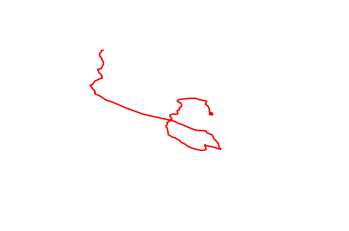

1


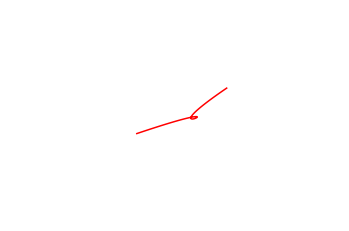

2


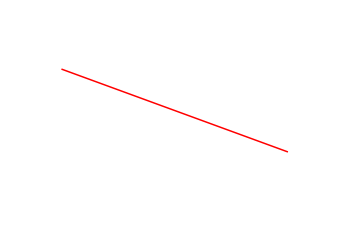

3


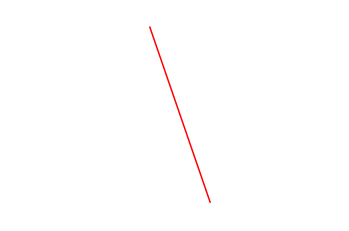

4


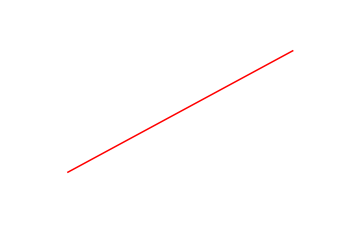

5


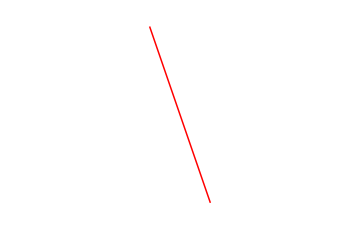

6


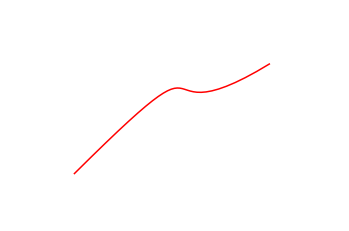

7


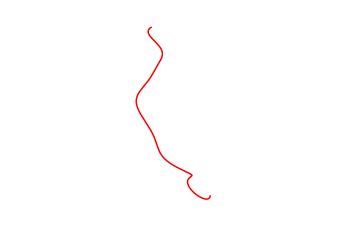

8


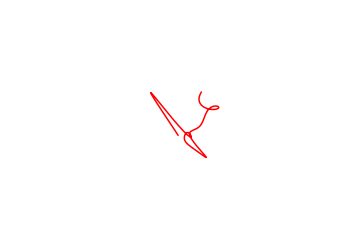

9


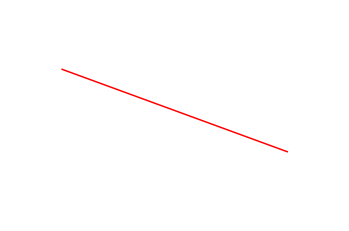

10


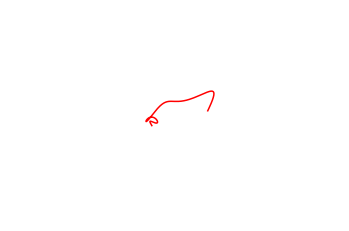

11


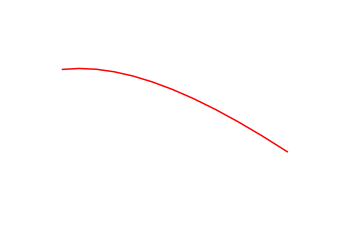

12


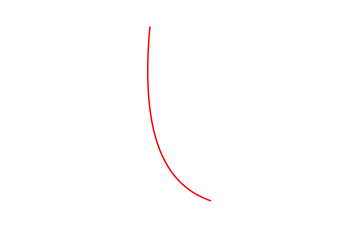

13


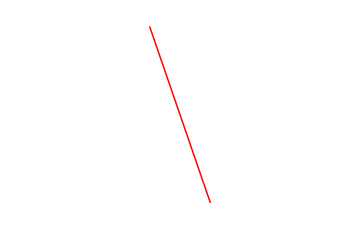

14


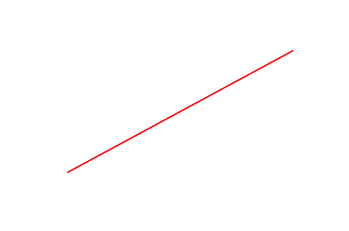

15


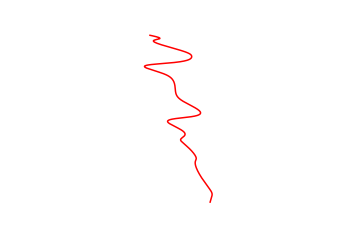

16


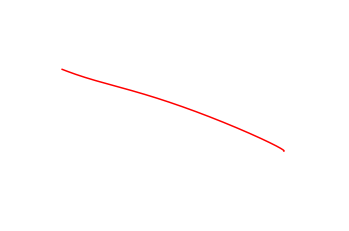

17


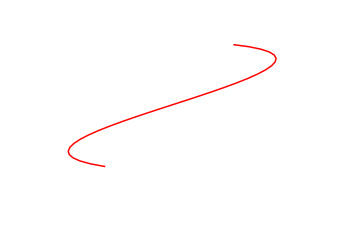

18


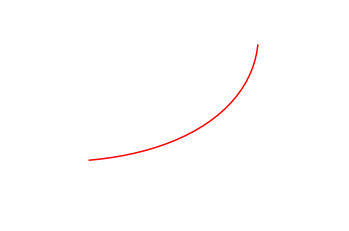

19


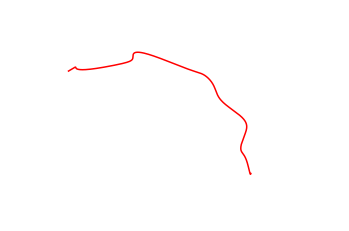

20


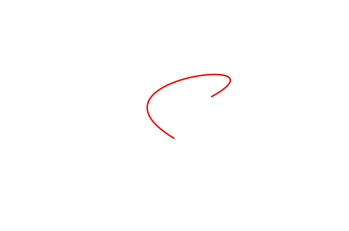

21


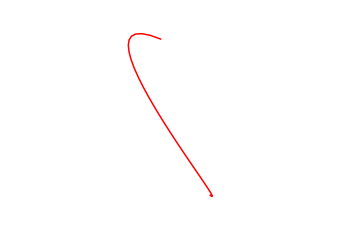

22


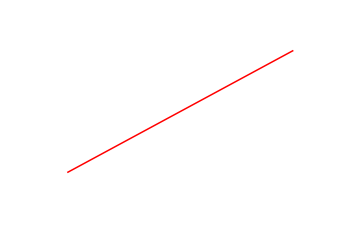

23


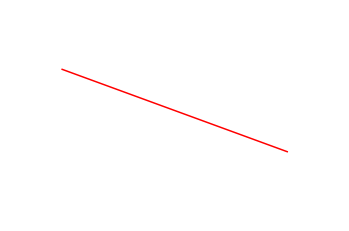

24


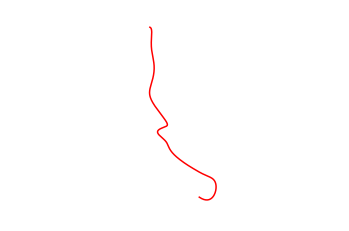

25


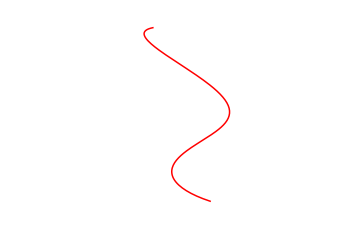

26


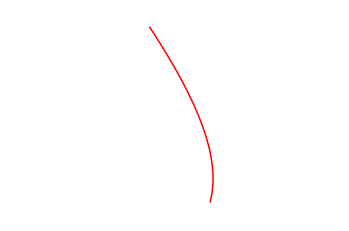

27


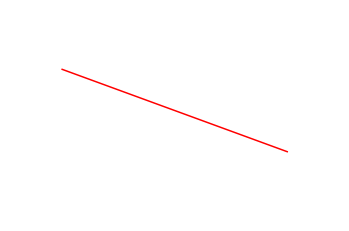

28


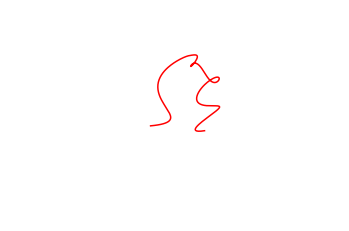

29


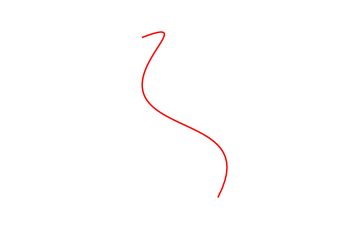

30


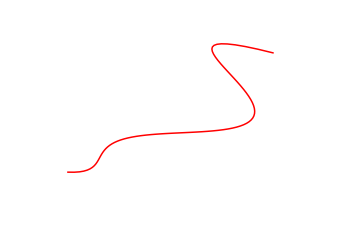

31


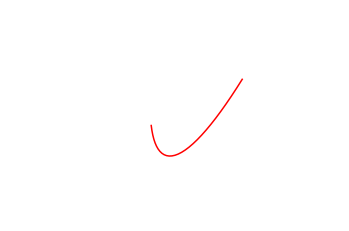

32


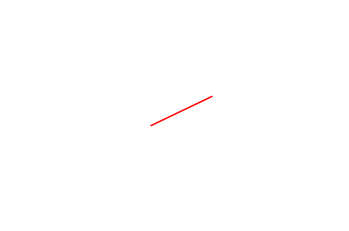

33


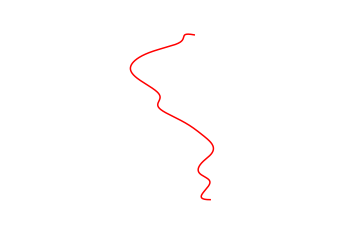

34


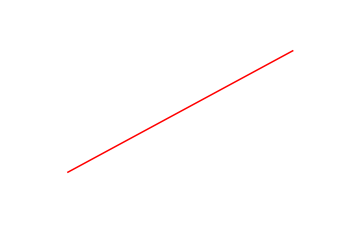

35


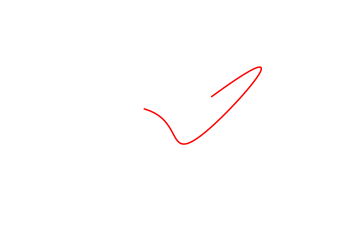

36


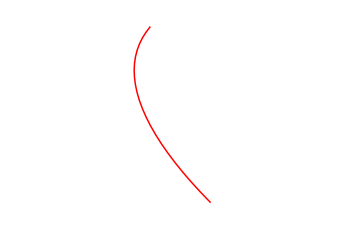

37


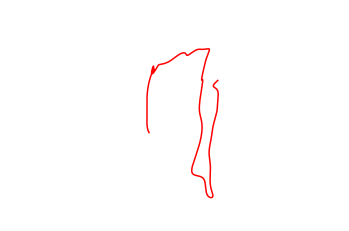

38


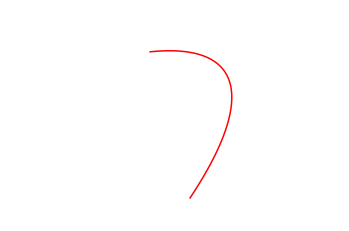

39


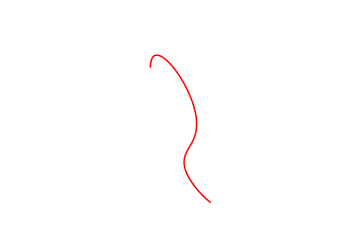

40


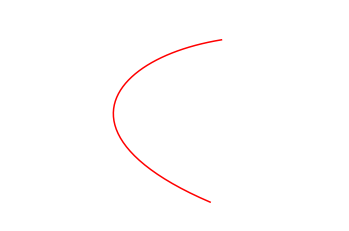

41


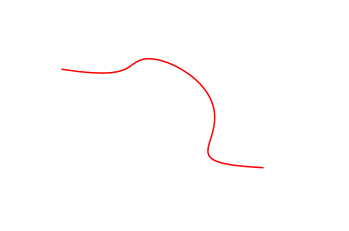

42


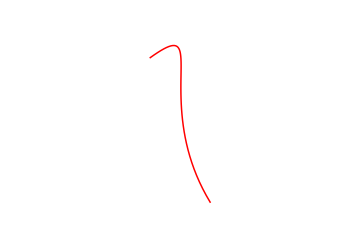

43


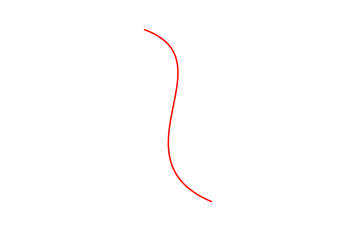

44


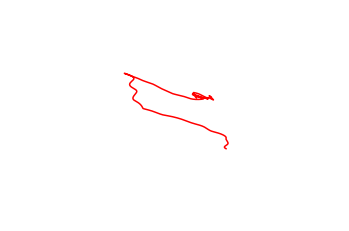

45


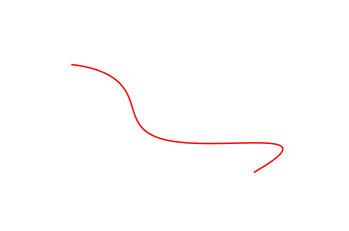

46


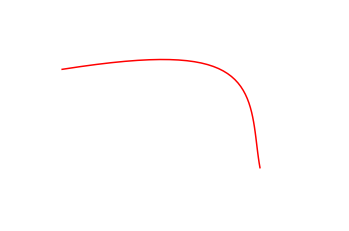

47


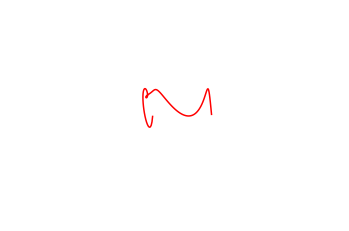

48


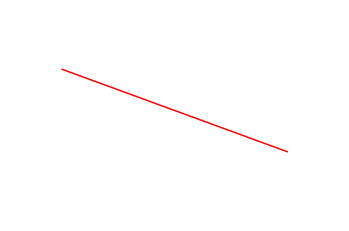

49


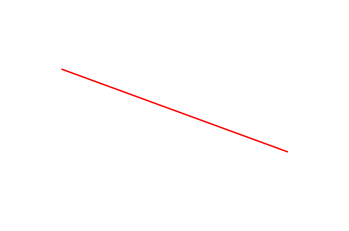

50


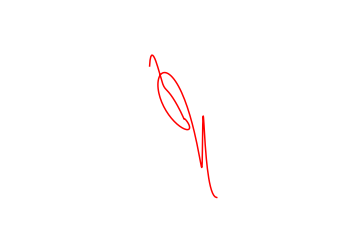

51


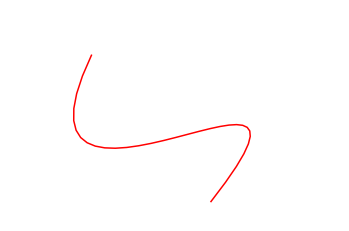

52


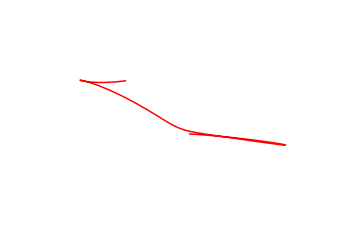

53


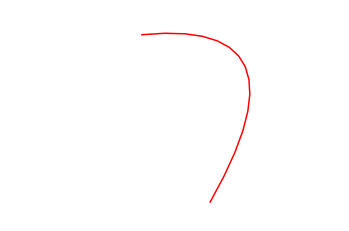

54


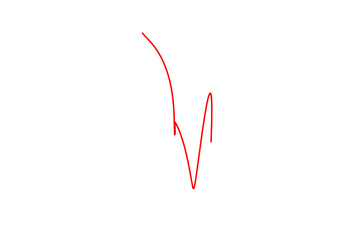

55


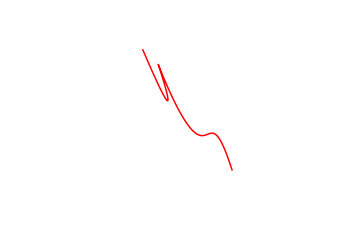

56


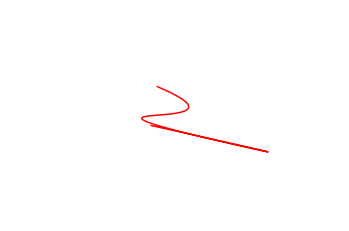

57


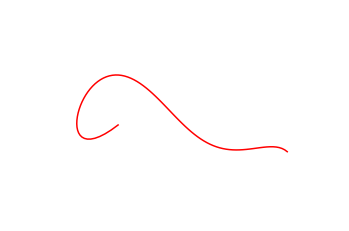

58


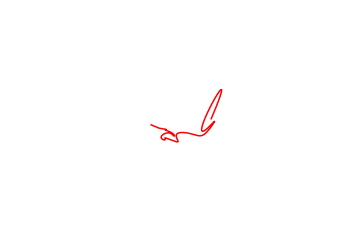

59


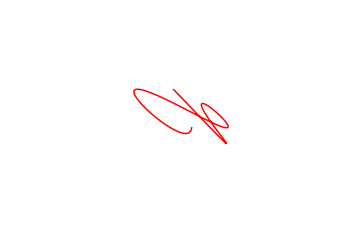

60


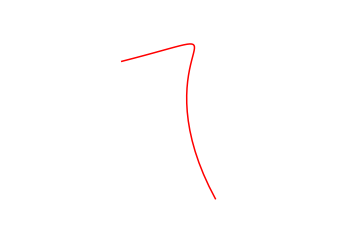

61


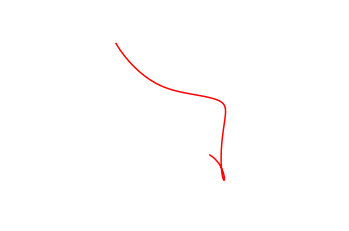

62


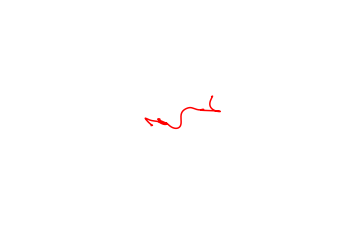

63


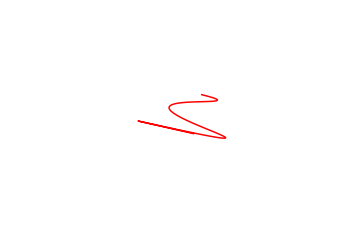

64


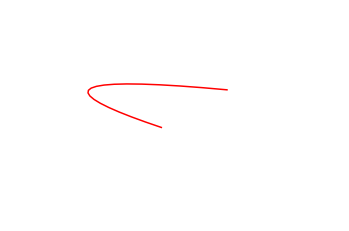

65


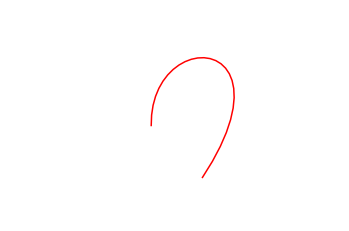

66


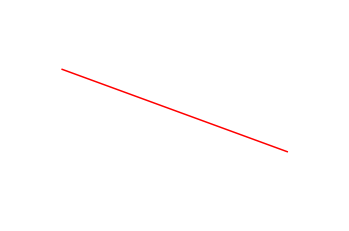

67


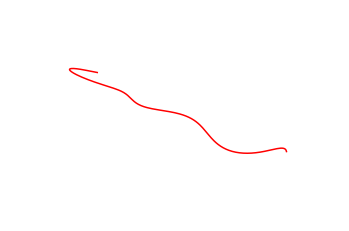

68


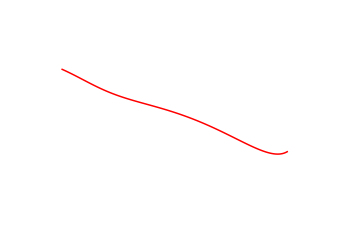

69


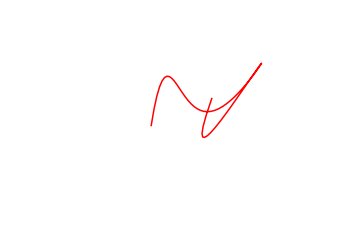

70


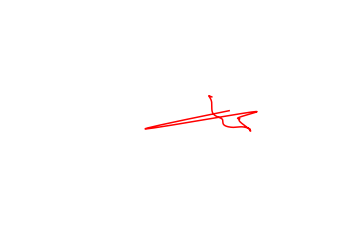

71


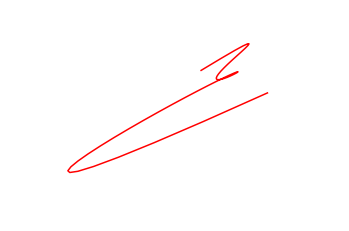

72


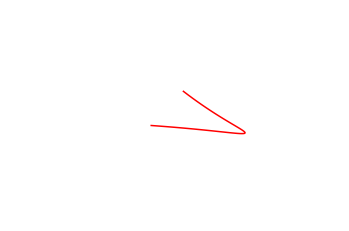

73


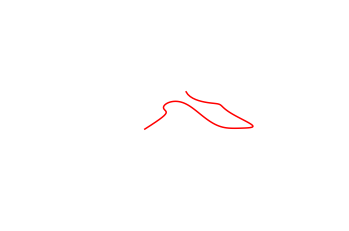

74


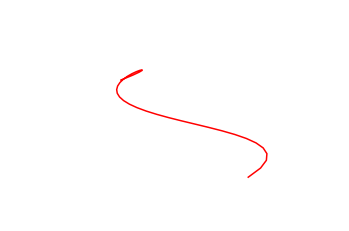

75


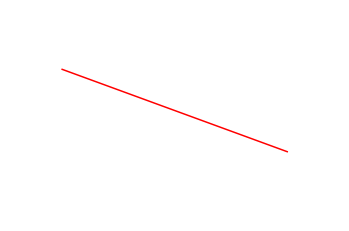

76


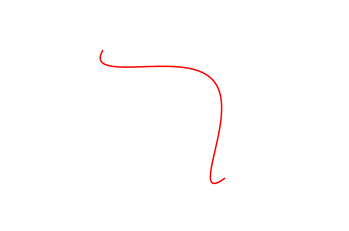

77


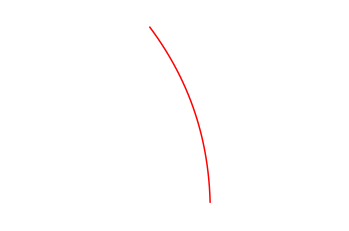

78


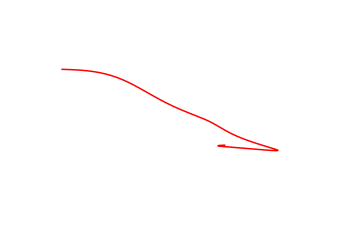

79


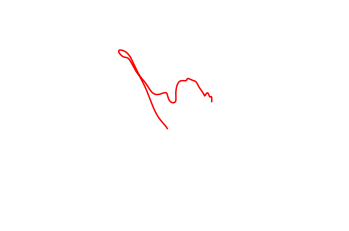

80


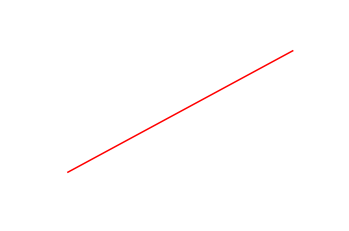

81


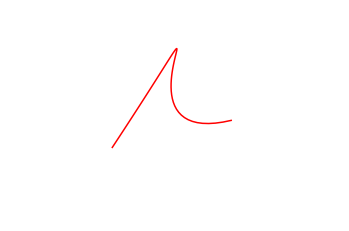

82


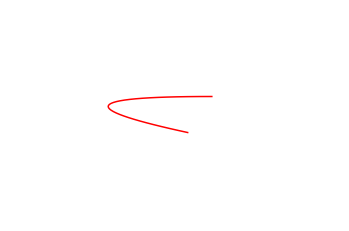

83


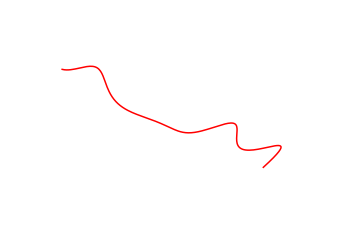

84


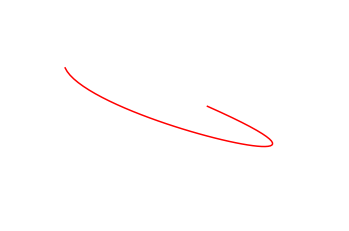

85


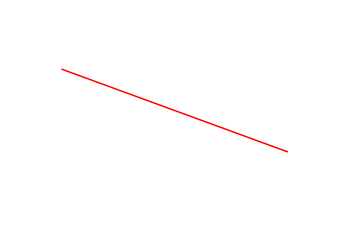

86


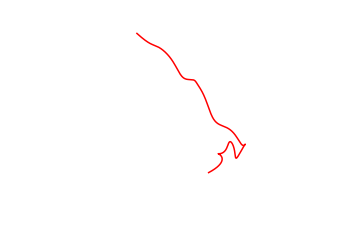

87


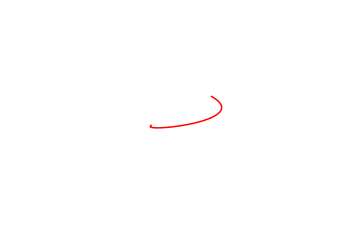

88


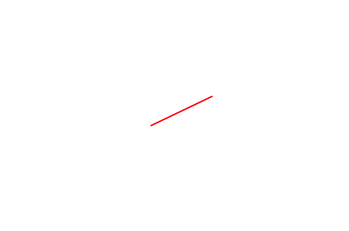

89


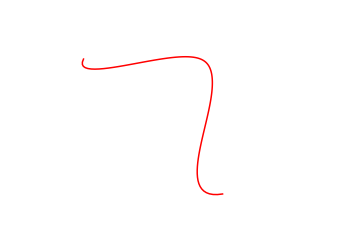

90


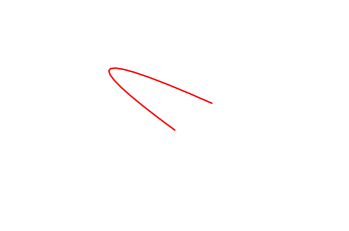

91


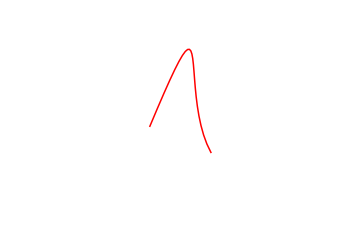

92


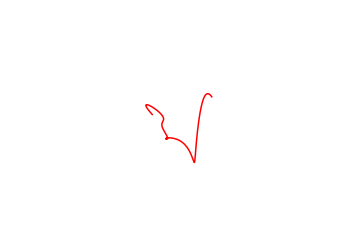

93


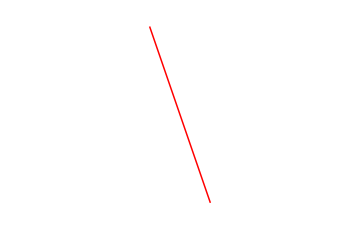

94


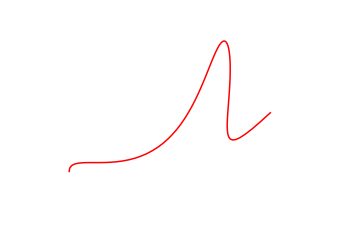

95


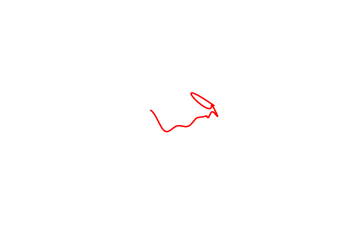

96


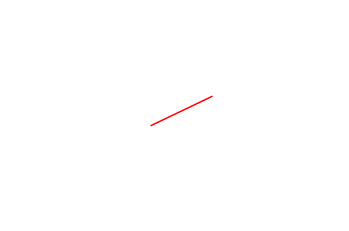

97


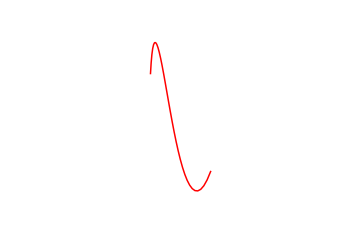

98


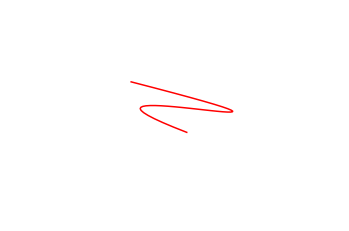

99


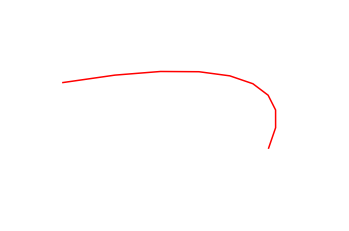

100


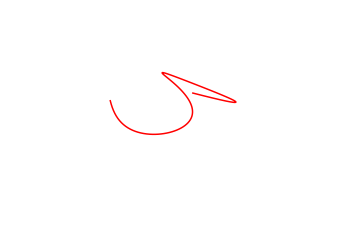

101


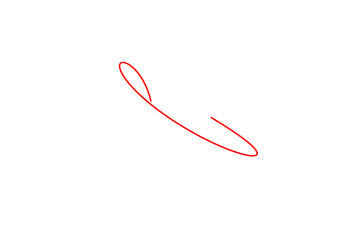

102


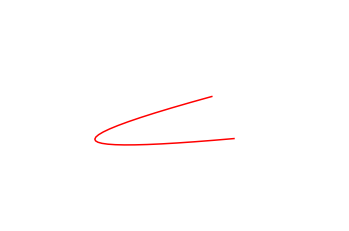

103


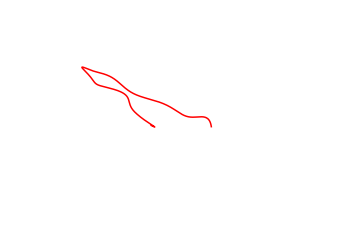

104


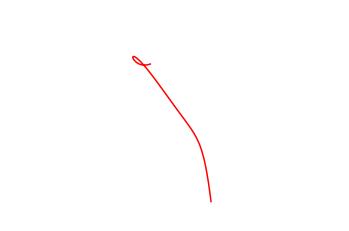

105


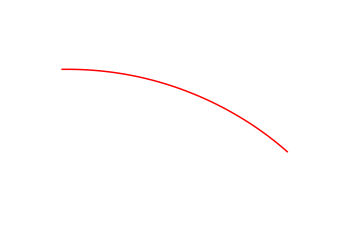

106


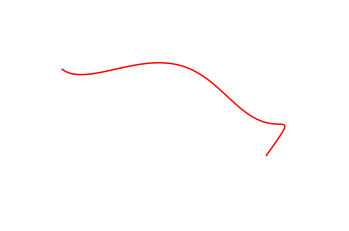

107


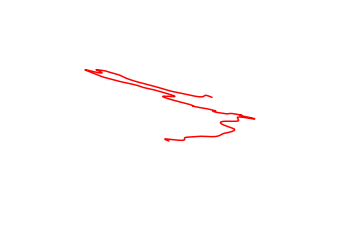

108


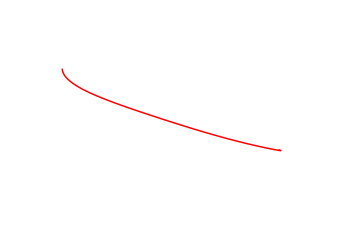

109


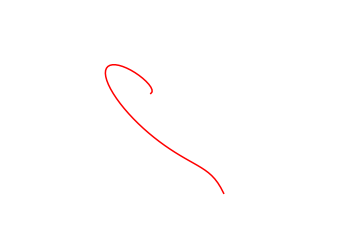

110


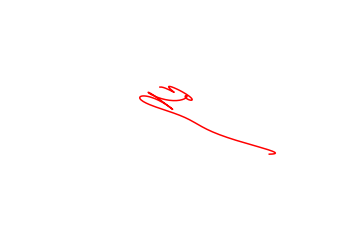

111


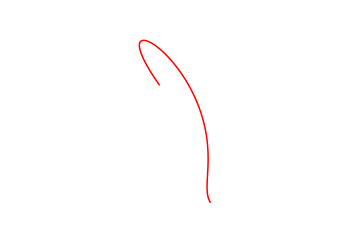

112


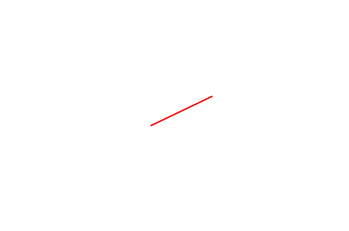

113


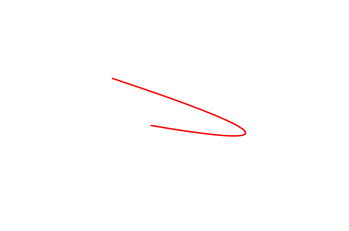

114


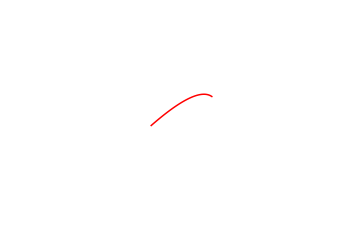

115


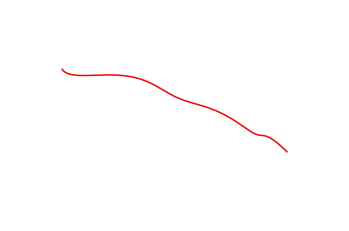

116


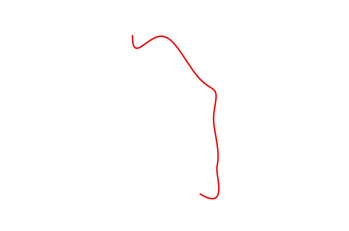

117


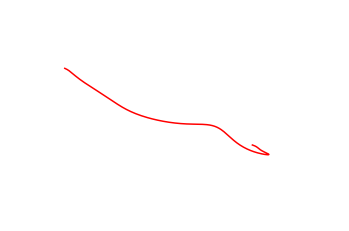

118


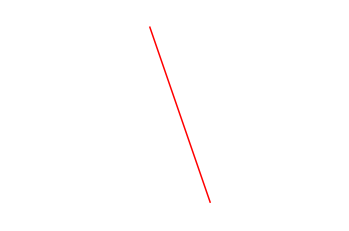

119


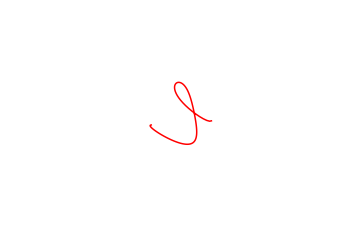

120


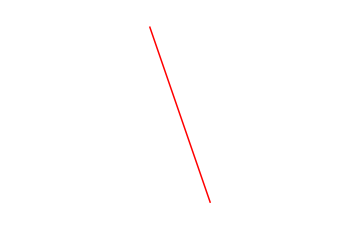

121


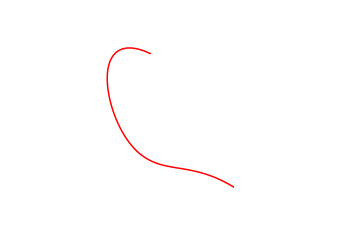

122


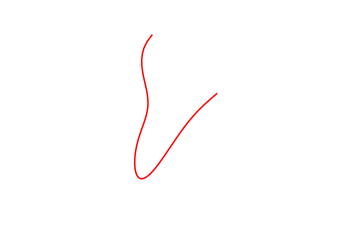

123


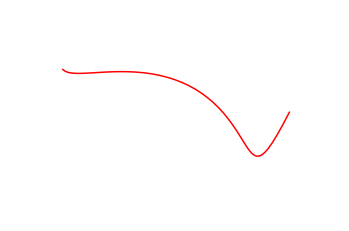

124


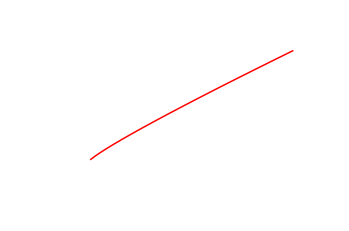

125


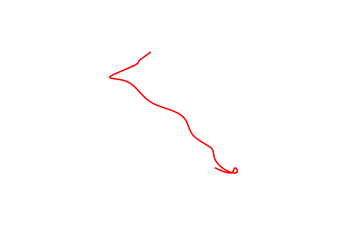

126


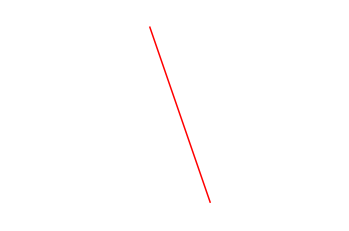

127


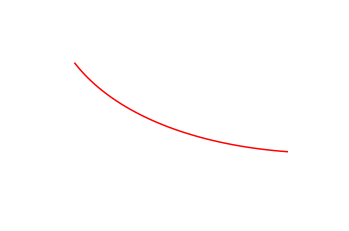

128


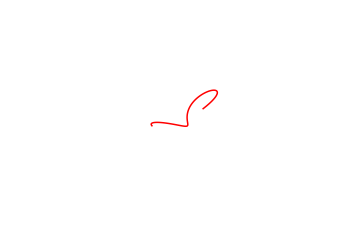

129


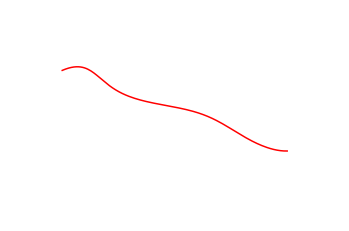

130


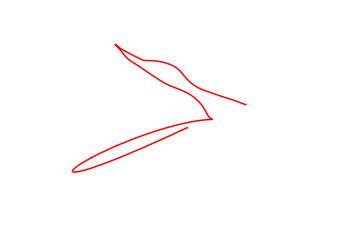

131


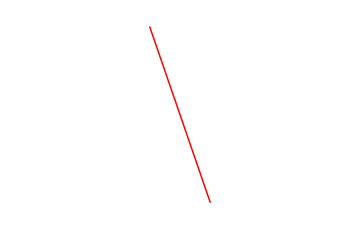

132


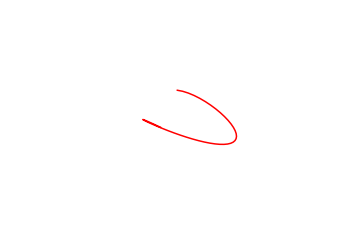

133


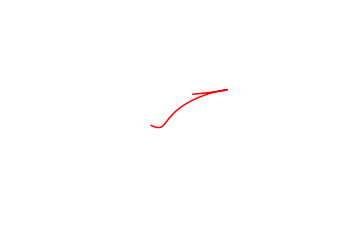

134


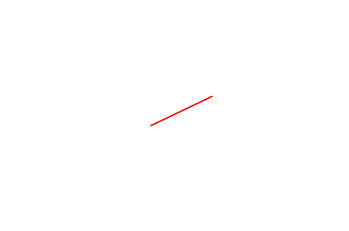

135


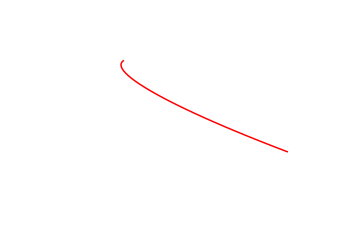

136


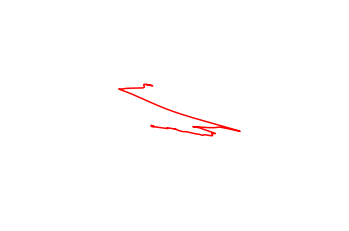

137


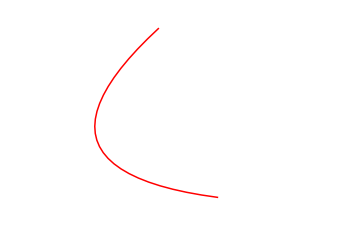

138


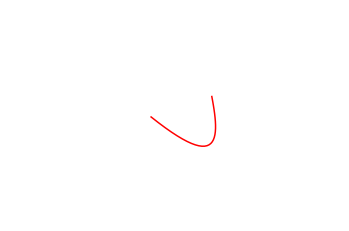

139


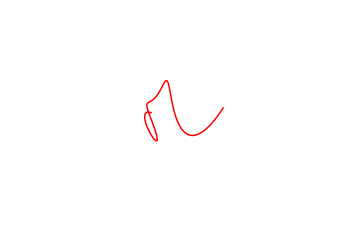

140


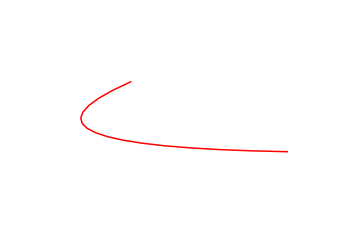

141


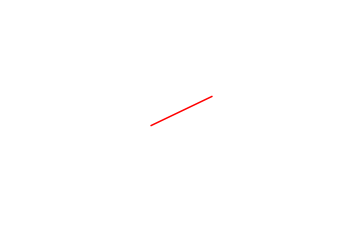

142


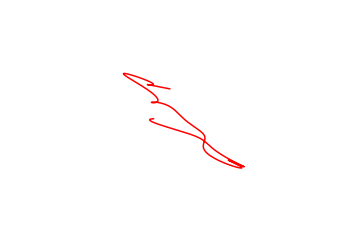

143


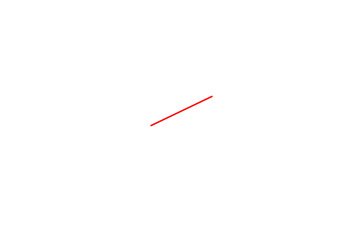

144


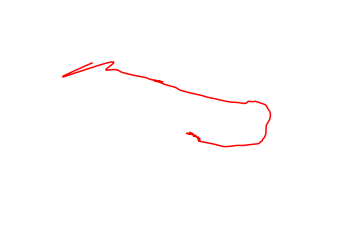

145


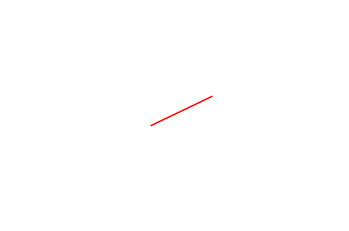

146


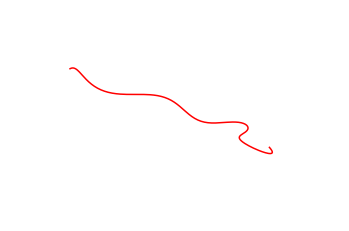

147


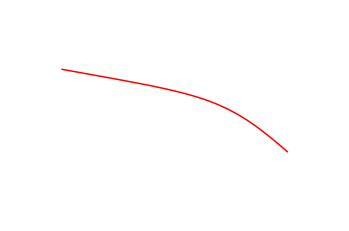

148


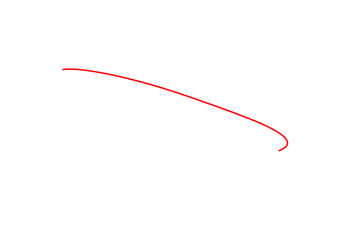

149


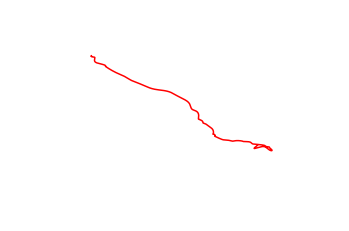

150


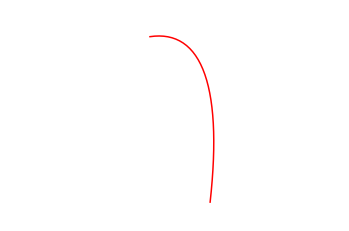

151


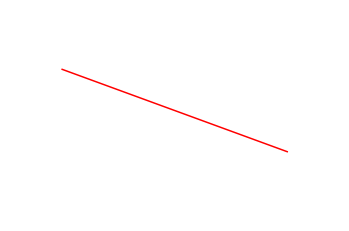

152


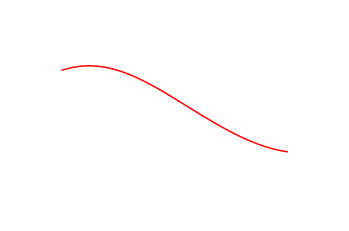

153


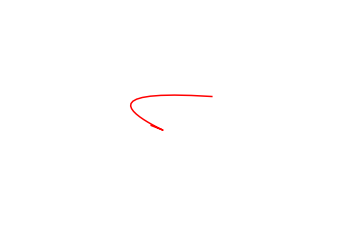

154


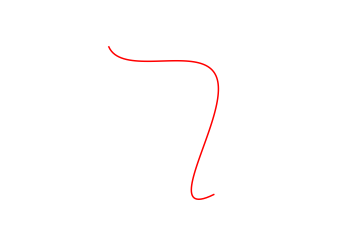

155


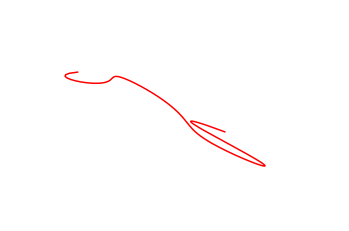

156


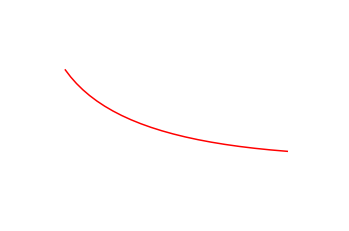

157


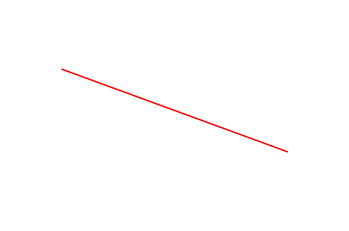

158


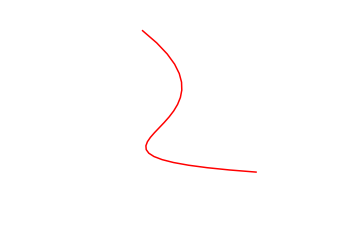

159


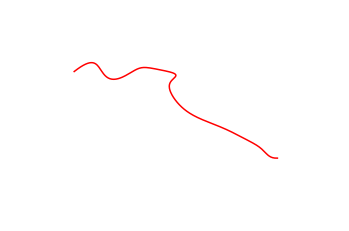

160


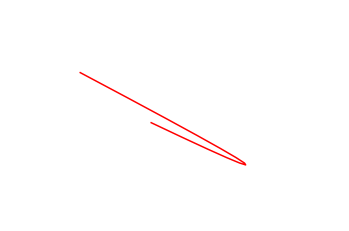

161


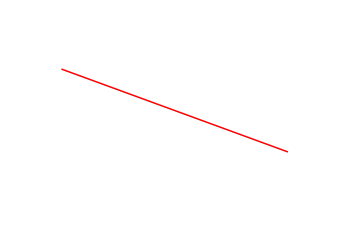

162


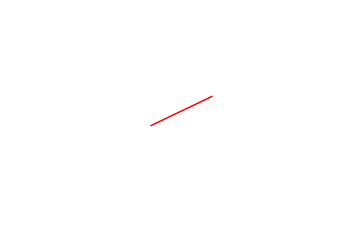

163


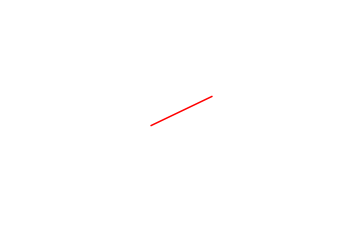

164


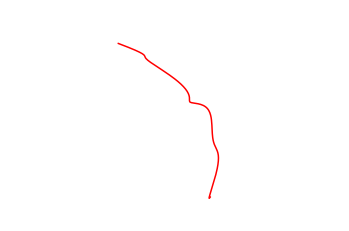

165


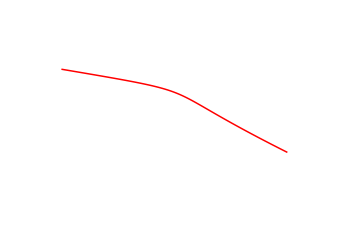

166


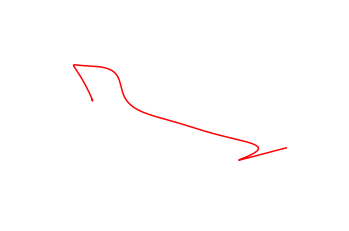

167


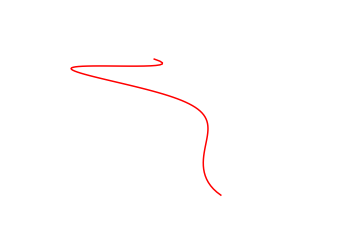

168


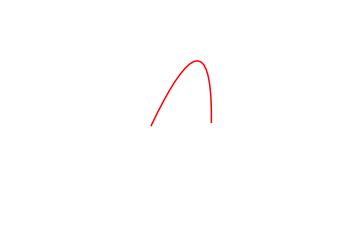

169


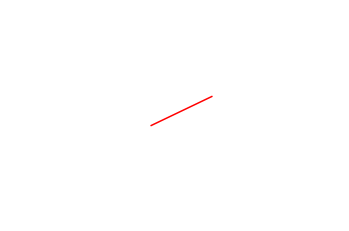

170


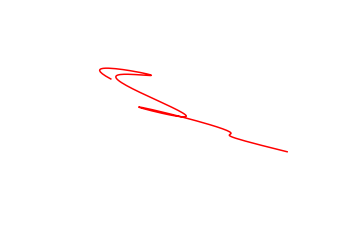

171


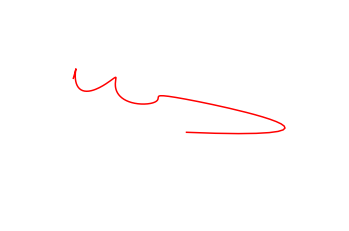

172


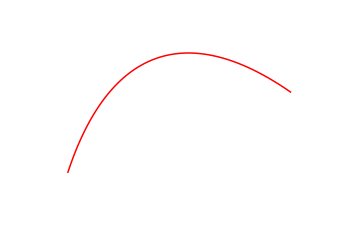

173


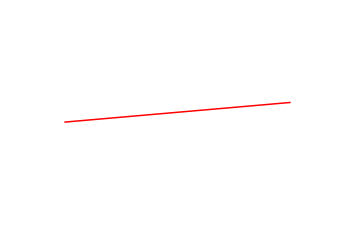

174


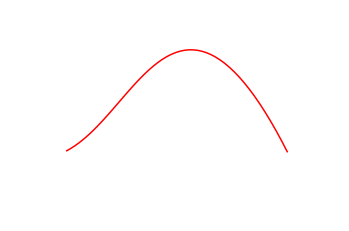

175


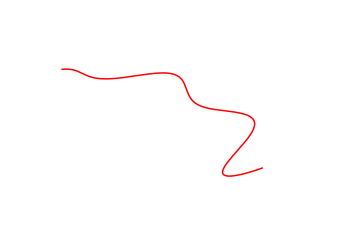

176


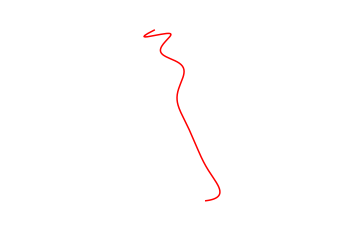

177


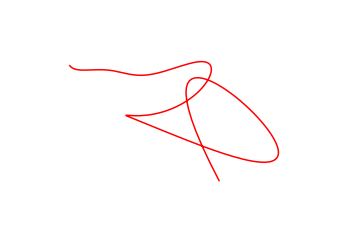

178


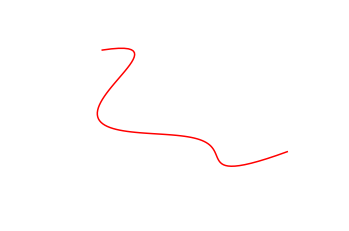

In [20]:
for node in spline_tree.nodes:
    path = spline_tree.nodes[node]["path"]
    locs = np.zeros((len(path),3))
    for p,point in enumerate(path):
        locs[p,:] = neuron.nodes[point]["loc"]

    spline = spline_tree.nodes[node]["spline"]
    u = spline[1]
    u = np.arange(u[0], u[-1]+0.9, 1)
    tck = spline[0]
    pts = splev(u, tck)
    
    print(node)
    fig = plt.figure()
    ax = fig.add_subplot(111,projection="3d")
    #ax.scatter(locs[:,0], locs[:,1], locs[:,2], 'blue')
    ax.plot(pts[0], pts[1], pts[2], 'red')
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    # Hide grid lines
    ax.grid(False)

    # Hide axes ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    plt.axis('off')
    plt.show()